## Performing a measurement along an arbitrary axis

Qiskit only allows measuring in the Z-basis. To make a measurement along other axes, we need to change our 'measurement perspective' with unitary rotations. Let us make a measurement along $\hat{n}=\frac{1}{\sqrt{2}}\left(\hat{x}+\hat{z}\right)$, which specifies our measurement direction on the Bloch Sphere, and calculate the expectation value of our measurement from the measurement statistics. Note that $\hat{n}$ lies on the $xz$ plane having angle of $\pi/4$ from the $z$ axis. Therefore, we need to consider a rotation about $y$ axis by an angle $\pi/4$ before the measurement.

Measurement stats: {'0': 484, '1': 540}
Probabilities: {'0': 0.47265625, '1': 0.52734375}
Expectation value: -0.0546875


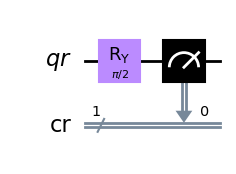

In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from math import pi

iter=1024

q = QuantumRegister(1,"qr")
c = ClassicalRegister(1,"cr")

qc = QuantumCircuit(q,c)
qc.ry(pi/2,0)

qc.measure(0,0)

job = execute(qc,Aer.get_backend('qasm_simulator'),shots=iter)
counts = job.result().get_counts(qc)

probs = {}
for i in ['0','1']:  # Calculate the probabilities from measurement statistics
  probs[i] = counts[i]/iter
  
expn=probs['0']*(+1)+probs['1']*(-1) # Expectation value of the measurement along n

print("Measurement stats:",counts)
print("Probabilities:",probs)
print("Expectation value:",expn)
qc.draw(output='mpl')